<a href="https://colab.research.google.com/github/Suhas-S63/Machine_Learning_Lab_T1/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tel_data = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
tel_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
tel_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
tel_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
tel_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = tel_data.drop(columns = ['customerID','SeniorCitizen','tenure','MonthlyCharges','TotalCharges'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
  df[col] = le.fit_transform(df[col])

In [ ]:
X = df.drop(columns = ['Churn'])
Y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef

In [ ]:
X_training_prediction = classifier.predict(X_train)
training_accuracy = accuracy_score(X_training_prediction, Y_train)
precision = precision_score(X_training_prediction, Y_train)
recall = recall_score(X_training_prediction, Y_train)
f1 = f1_score(X_training_prediction, Y_train)
roc_auc = roc_auc_score(X_training_prediction, Y_train)
kappa = cohen_kappa_score(X_training_prediction, Y_train)
mcc = matthews_corrcoef(X_training_prediction, Y_train)
print("TRAINING DATA SCORES")
print("Accuracy score:", training_accuracy)
print("Precision score:", precision)
print("Recall score:", recall)
print("F1 score:", f1)
print("ROC_AUC score:", roc_auc)
print("Kappa score:", kappa)
print("Matthew's Correlation Coeff:",mcc)
print("\n\n")

X_testing_prediction = classifier.predict(X_test)
testing_accuracy = accuracy_score(X_testing_prediction, Y_test)
precision = precision_score(X_testing_prediction, Y_test)
recall = recall_score(X_testing_prediction, Y_test)
f1 = f1_score(X_testing_prediction, Y_test)
roc_auc = roc_auc_score(X_testing_prediction, Y_test)
kappa = cohen_kappa_score(X_testing_prediction, Y_test)
mcc = matthews_corrcoef(X_testing_prediction, Y_test)
print("TESTING DATA SCORES")
print("Accuracy score:", testing_accuracy)
print("Precision score:", precision)
print("Recall score:", recall)
print("F1 score:", f1)
print("ROC_AUC score:", roc_auc)
print("Kappa score:", kappa)
print("Matthew's Correlation Coeff:",mcc)

TRAINING DATA SCORES
Accuracy score: 0.7820376286829961
Precision score: 0.46835443037974683
Recall score: 0.6204766107678729
F1 score: 0.5337889141989369
ROC_AUC score: 0.7215913380433454
Kappa score: 0.3951622082598619
Matthew's Correlation Coeff: 0.4018178154532106



TESTING DATA SCORES
Accuracy score: 0.7721788502484032
Precision score: 0.4266304347826087
Recall score: 0.5880149812734082
F1 score: 0.4944881889763779
ROC_AUC score: 0.7016257042969493
Kappa score: 0.35220988738232295
Matthew's Correlation Coeff: 0.35976201054459667


Confusion Matrix Visualisation for Testing and Predictions data on Churn column

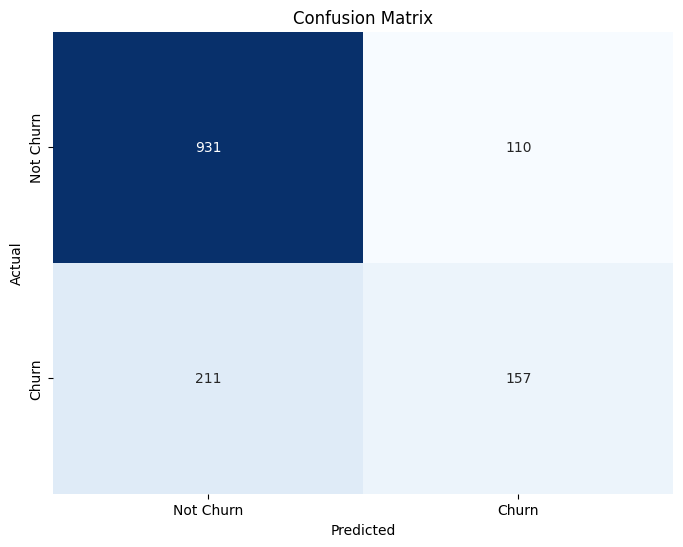

In [ ]:
from sklearn.metrics import confusion_matrix
prediction = classifier.predict(X_test)
matrix = confusion_matrix(Y_test, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Plotting the ROC(Reciever Operating Curve) and calculating AUC(Area Under Curve)

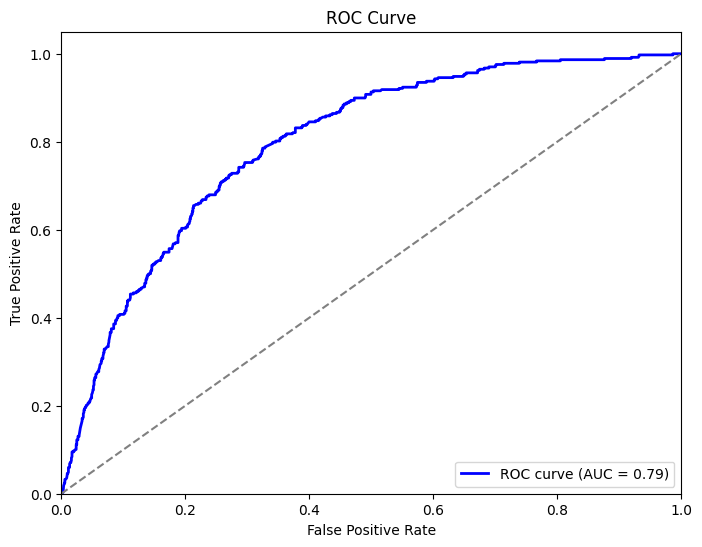

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
probs = classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, probs)
roc_auc = roc_auc_score(Y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Visualising Precision-Recall Curve

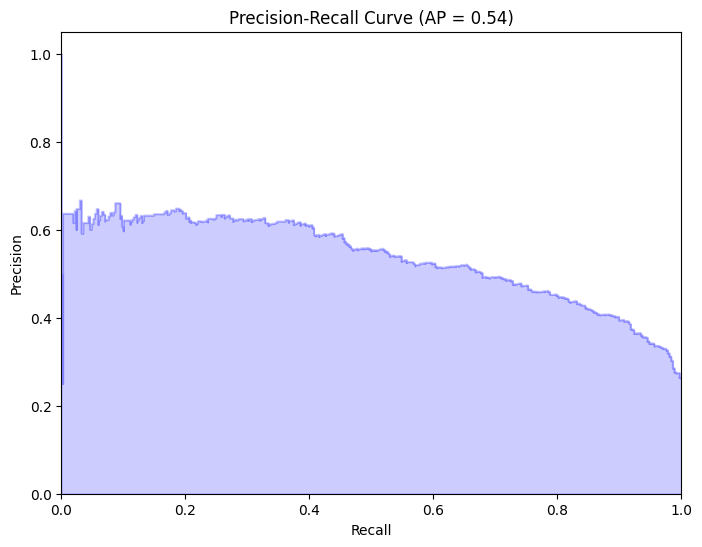

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(Y_test, probs)
avg_precision = average_precision_score(Y_test, probs)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP = {:.2f})'.format(avg_precision))
plt.show()

Sigmoid function

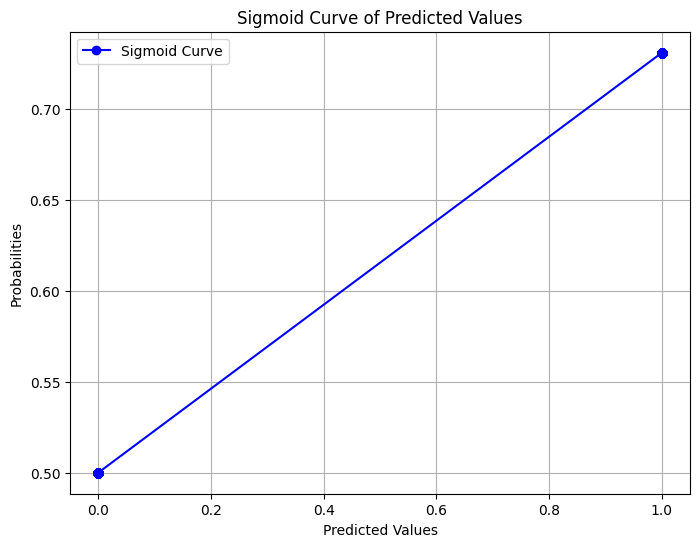

In [ ]:
def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))



probabilities = sigmoid(prediction)

plt.figure(figsize=(8, 6))
plt.plot(prediction, probabilities, label='Sigmoid Curve', color='blue', marker='o')
plt.xlabel('Predicted Values')
plt.ylabel('Probabilities')
plt.title('Sigmoid Curve of Predicted Values')
plt.grid(True)
plt.legend()
plt.show()